# Visualisations


In [1]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Imports
import json
import os
import re

import matplotlib.pyplot as plt
import pandas as pd
from dotenv import load_dotenv
from mistralai import Mistral
from tqdm.auto import tqdm
from pyfonts import load_google_font
from aquarel import load_theme

load_dotenv()
tqdm.pandas()


## Load Datasets


### Corpus

- Full RTBF corpus
- RTBF Corpus with `assad_vs_daech` stereotype analysis


In [6]:
rtbfCorpus_full = pd.read_csv("./dataset/rtbfCorpus.csv", sep="|", encoding="utf-8")

In [5]:
rtbf_assad_vs_daech = pd.read_pickle("./output/assad_vs_daech/3+_keywords.pkl")

In [4]:
rtbf_assad_vs_daech_deepdive = pd.read_pickle(
    "./output/assad_vs_daech/analyse_prismes_acteurs.pkl"
)

## Graphs


<Axes: title={'center': 'Répartition des articles de la RTBF par année de publication'}, xlabel='Année de publication', ylabel="Nombre d'articles">

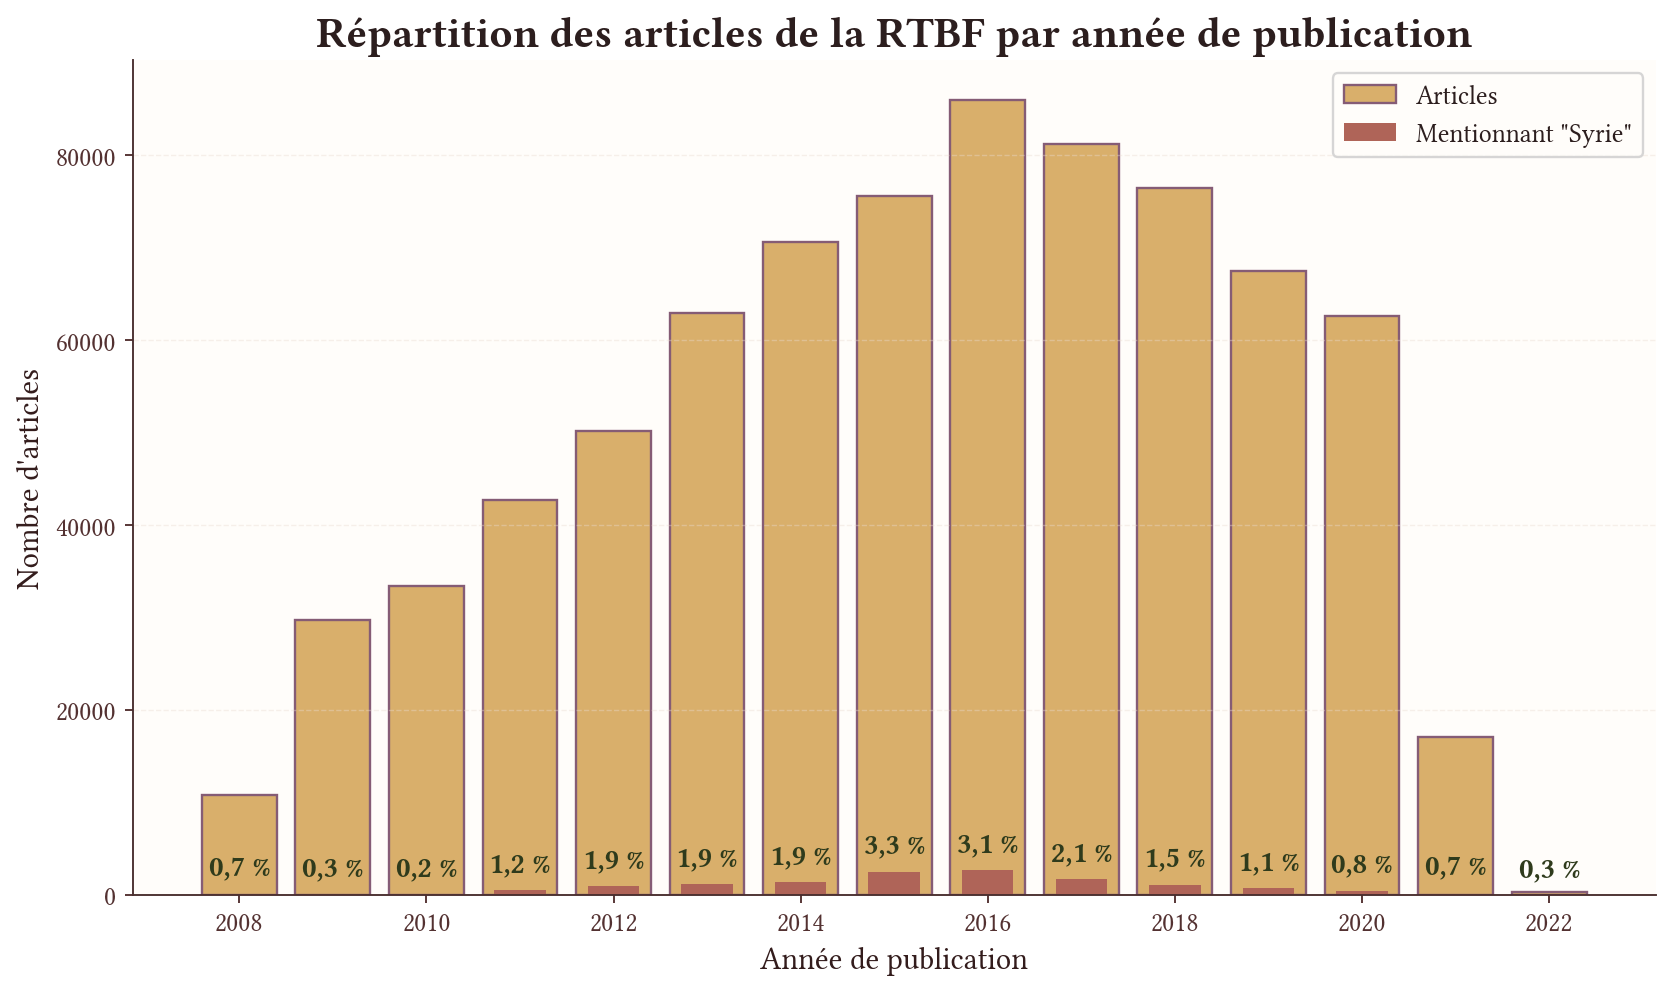

In [7]:
from src.plotting_lib import plot_article_distribution_by_year

plot_article_distribution_by_year(
    rtbfCorpus_full,
    keywords=["Syrie"],
    text_columns=["title", "text_cleaned"],
    title="Répartition des articles de la RTBF par année de publication",
)


<Axes: title={'center': 'Répartition des articles de la RTBF (Catégorie "Monde") par année de publication'}, xlabel='Année de publication', ylabel="Nombre d'articles">

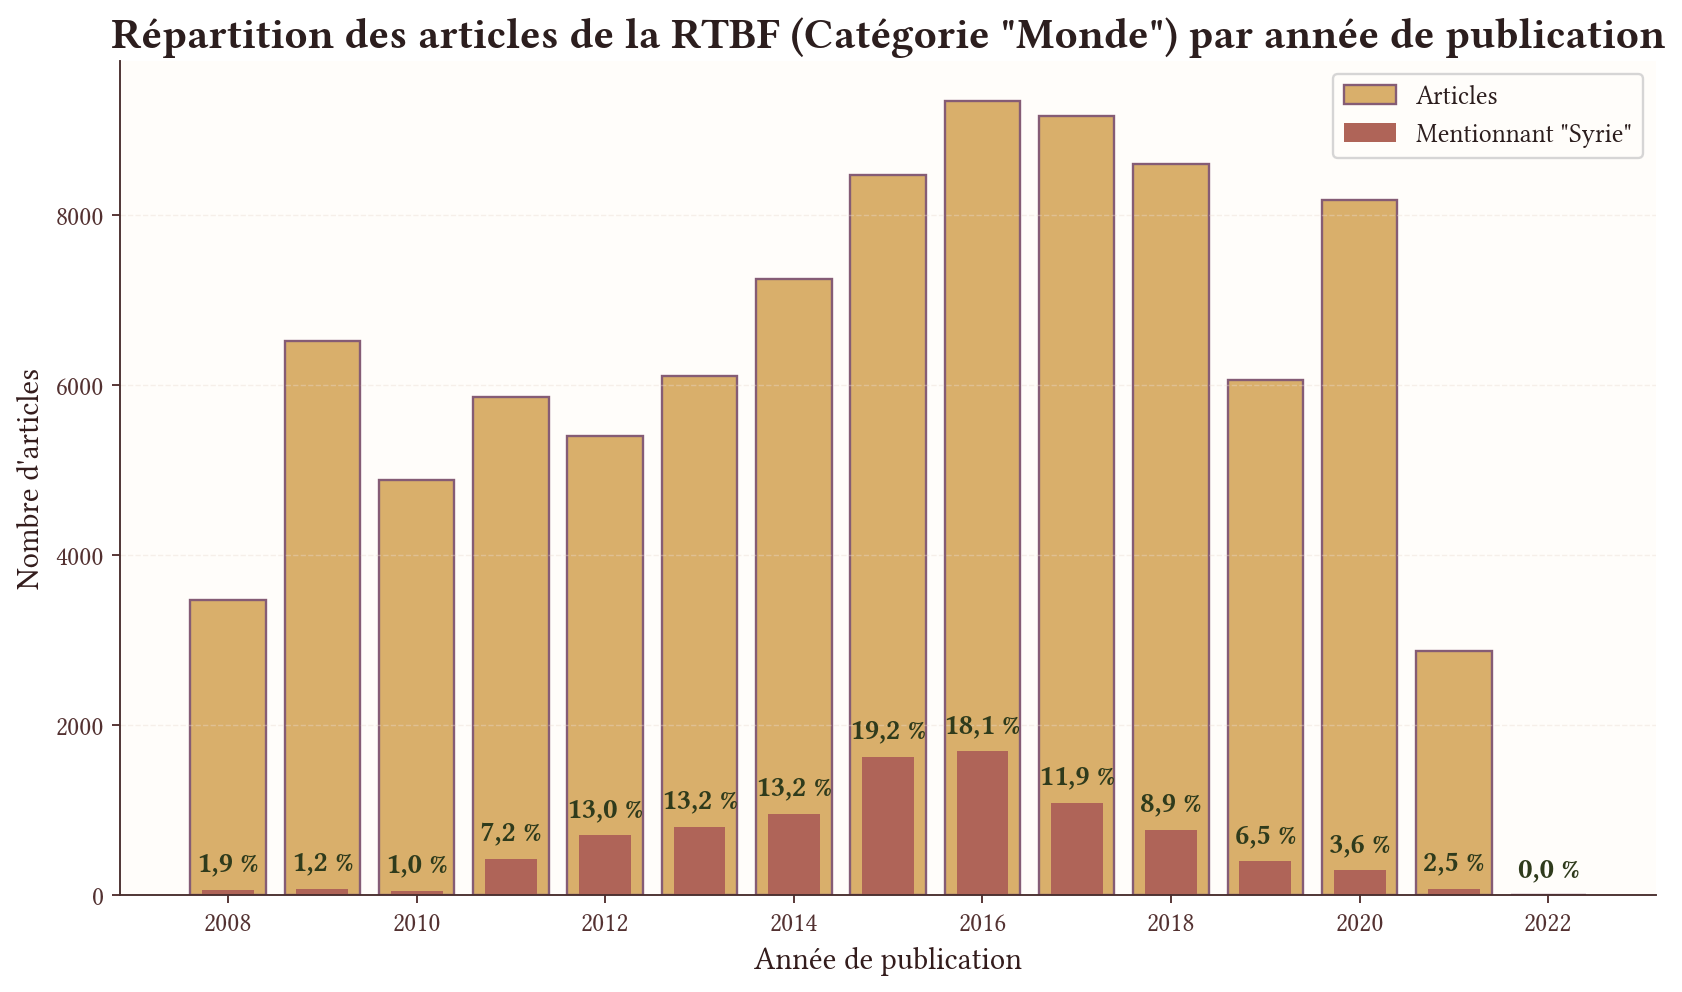

In [8]:
plot_article_distribution_by_year(
    rtbfCorpus_full[rtbfCorpus_full["category"] == "MONDE"],
    keywords=["Syrie"],
    text_columns=["title", "text_cleaned"],
    title='Répartition des articles de la RTBF (Catégorie "Monde") par année de publication',
)


<Axes: title={'center': 'Distribution par catégories des articles de la RTBF mentionnant la Syrie'}, xlabel="Nombre d'articles mentionnant les mots-clés">

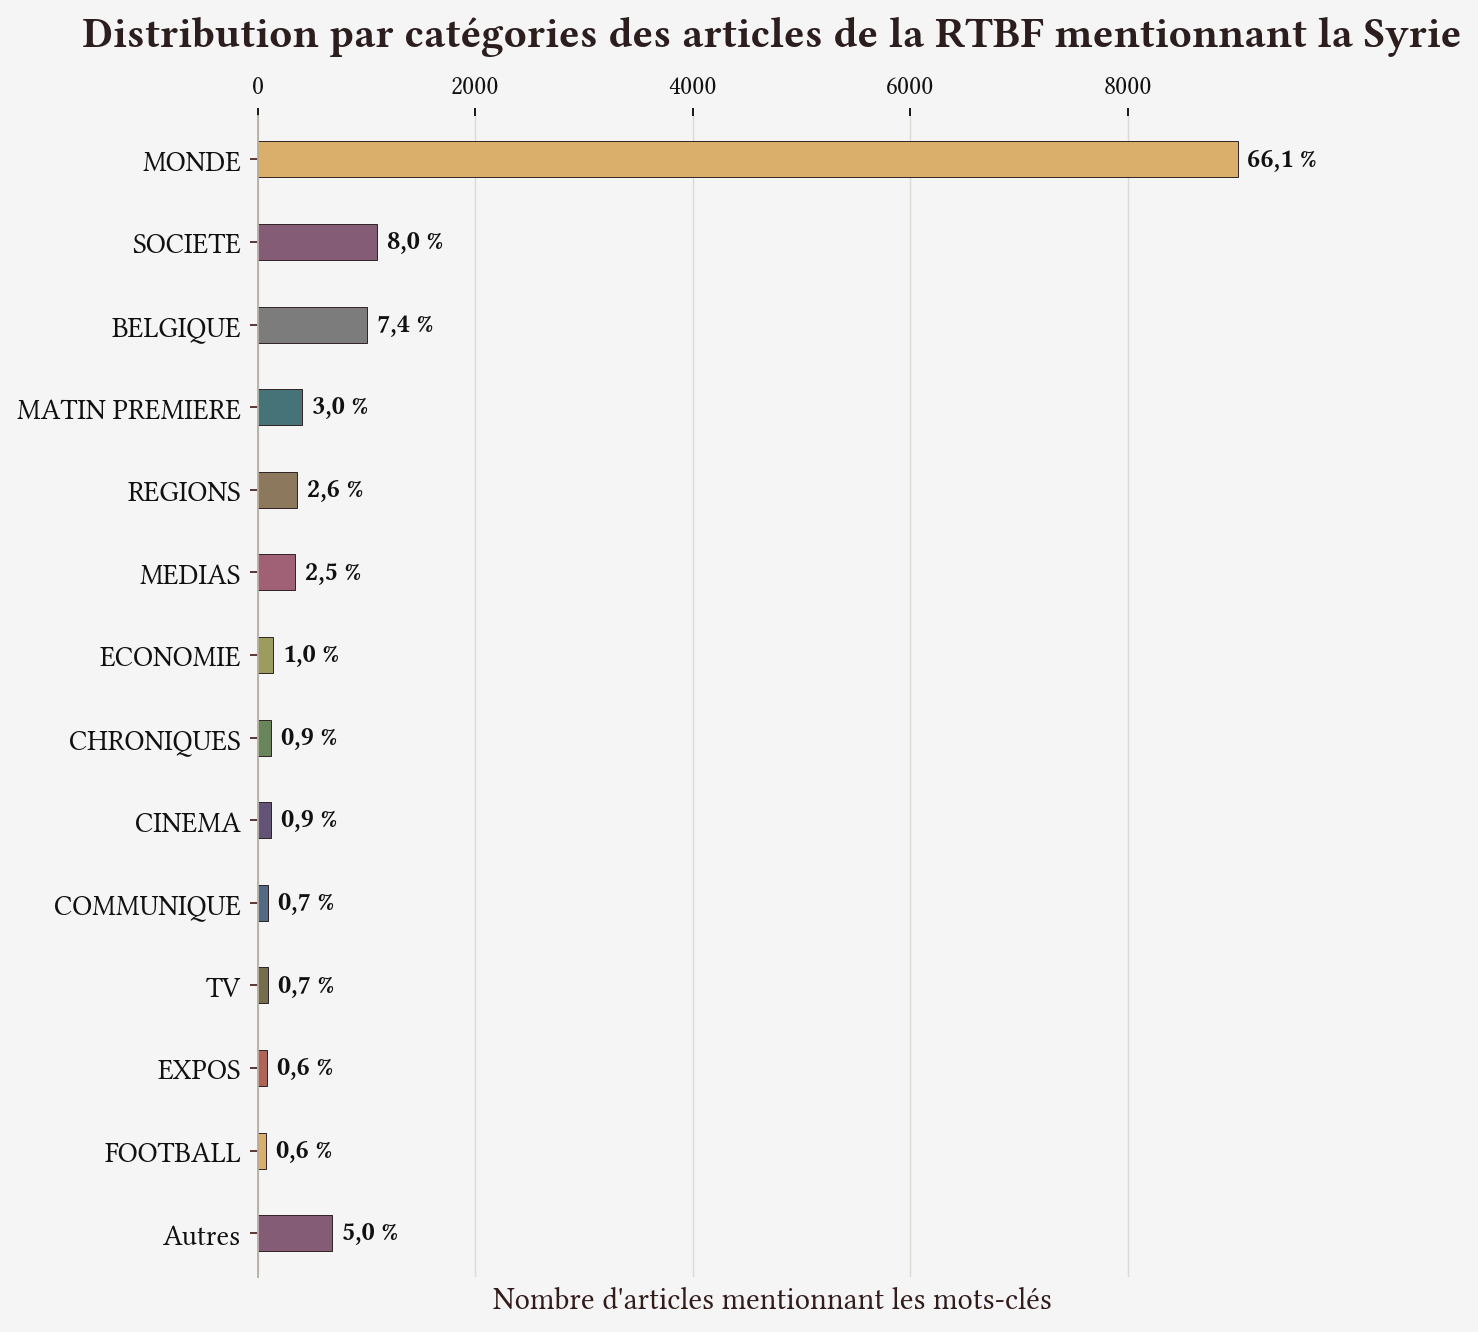

In [15]:
from src.plotting_lib import plot_keyword_category_distribution
import numpy as np

plot_keyword_category_distribution(
    rtbfCorpus_full,
    keywords=["Syrie"],
    category_column="category",
    text_columns=["title", "text_cleaned"],
    title="Distribution par catégories des articles de la RTBF mentionnant la Syrie",
    min_share=0.005,
)


# "C'est soit Assad, soit Daech."


(<Axes: title={'center': 'Évolution de la position des articles RTBF sur le stéréotype (pourcentages)'}, xlabel='Année de publication', ylabel='Part des articles (stéréotype présent)'>,
 <Axes: ylabel="Nombre d'articles (stéréotype présent)">)

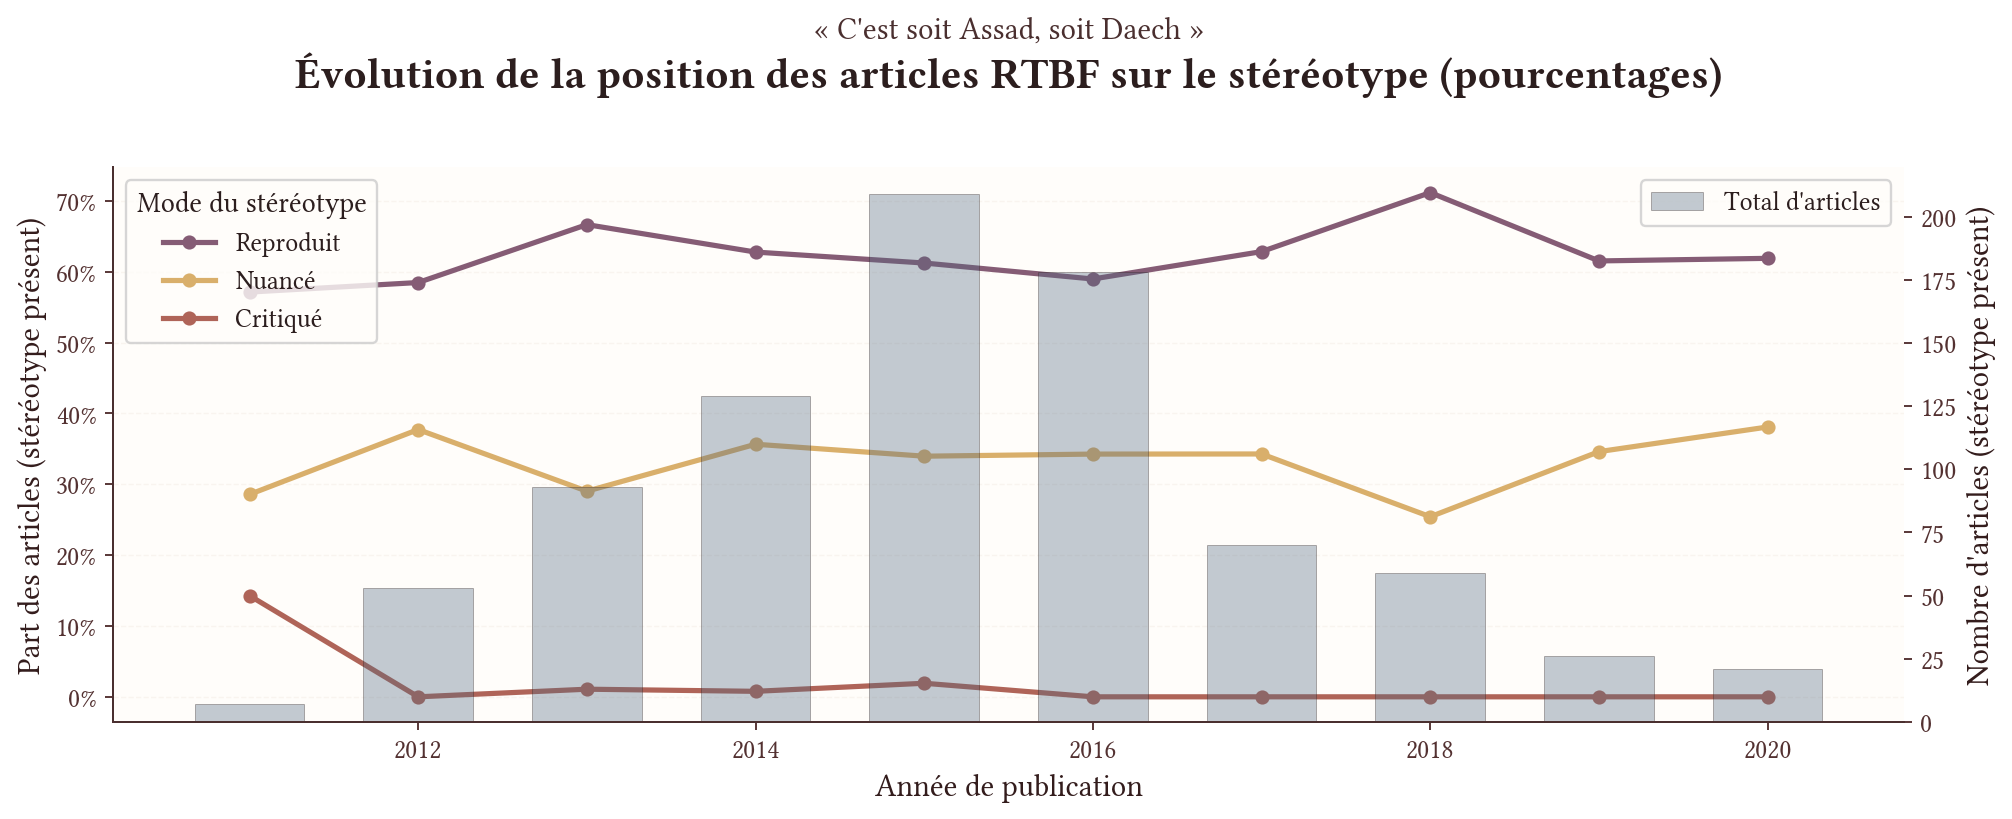

In [29]:
from src.plotting_lib import plot_stereotype_stance_over_time

plot_stereotype_stance_over_time(
    rtbf_assad_vs_daech,
    pub_date_col="pub_date",
    stereotype_name="C'est soit Assad, soit Daech",
    title="Évolution de la position des articles RTBF sur le stéréotype (pourcentages)",
)


(<Axes: title={'center': 'Évolution de la position des articles RTBF sur le stéréotype (absolu)'}, xlabel='Année de publication', ylabel="Nombre d'articles (stéréotype présent)">,
 <Axes: ylabel="Nombre d'articles (stéréotype présent)">)

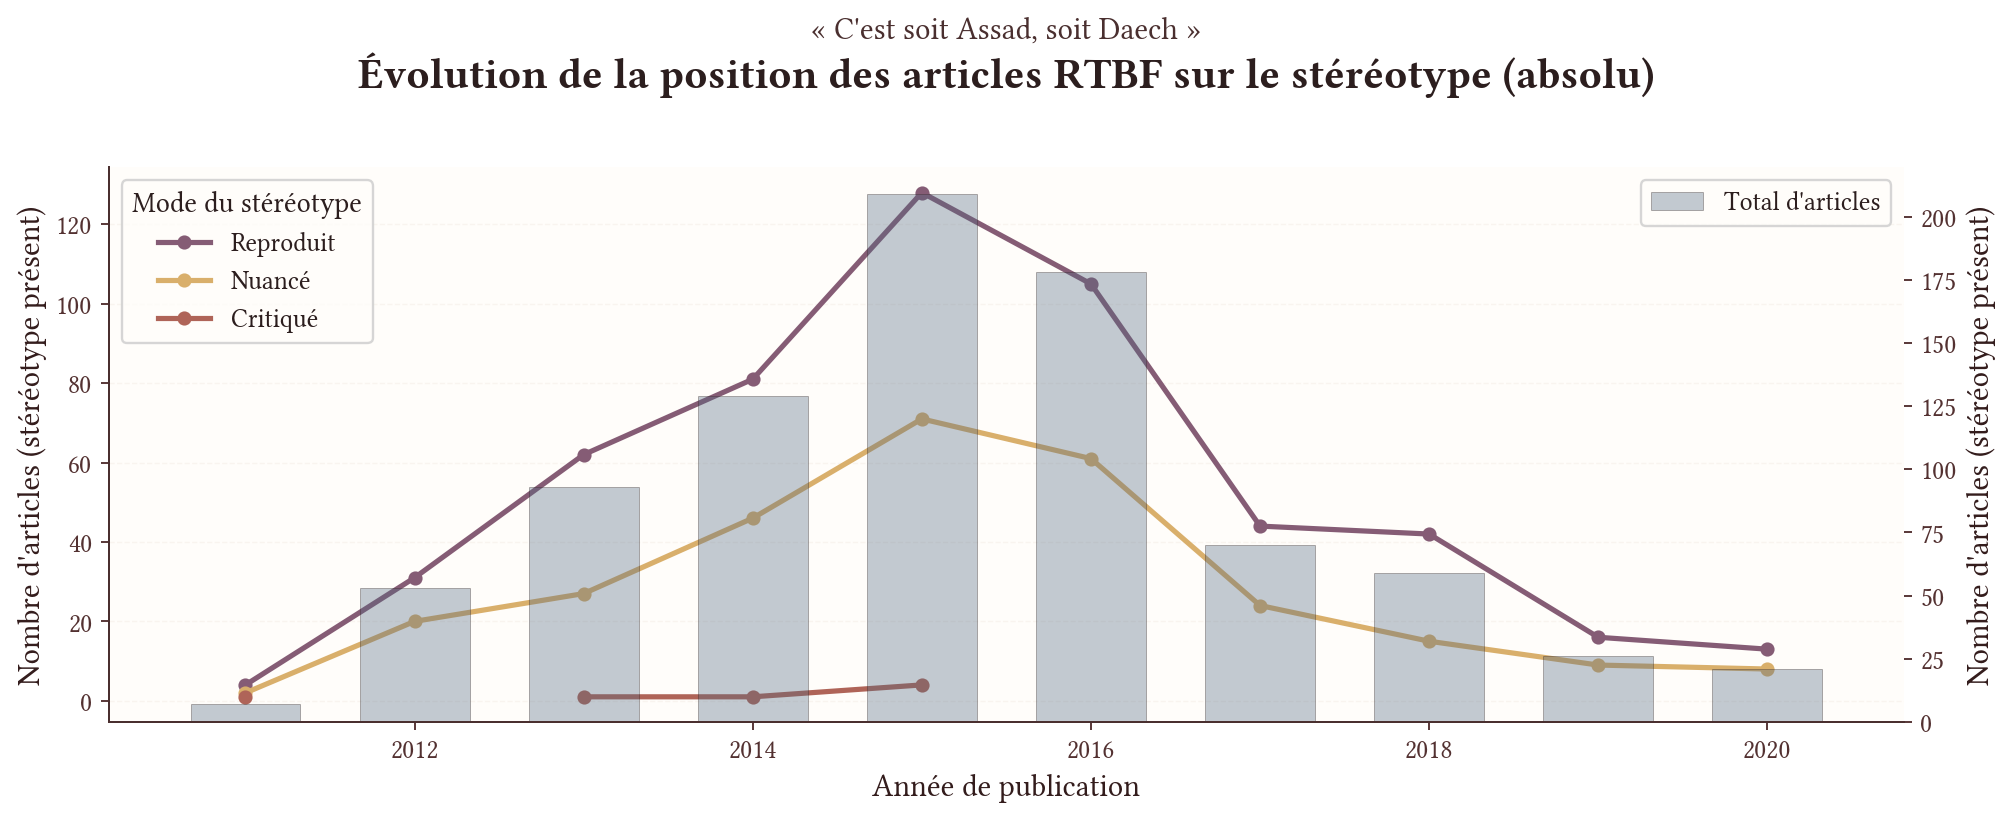

In [ ]:
plot_stereotype_stance_over_time(
    rtbf_assad_vs_daech,
    pub_date_col="pub_date",
    stereotype_name="C'est soit Assad, soit Daech",
    title="Évolution de la position des articles RTBF sur le stéréotype (absolu)",
    show_percentages=False,
)


(<Axes: title={'center': 'Évolution de la position des articles RTBF sur le stéréotype (pourcentages)'}, xlabel='Année de publication', ylabel='Part des articles (stéréotype présent)'>,
 <Axes: ylabel="Nombre d'articles (stéréotype présent)">)

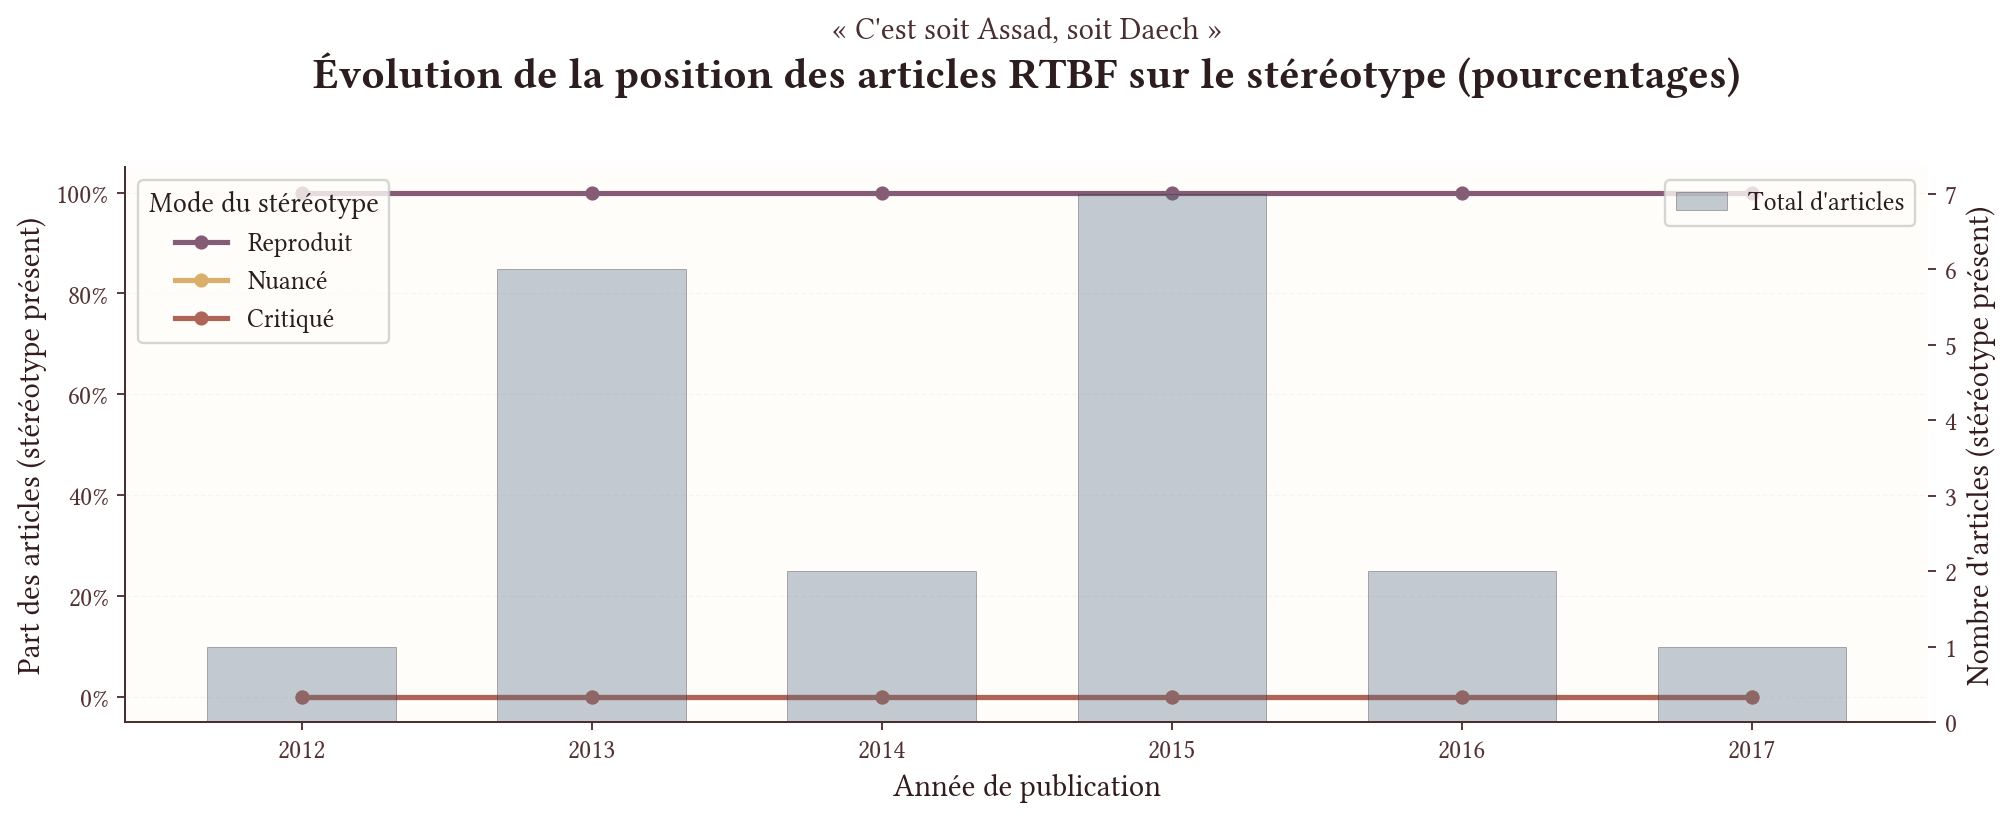

In [34]:
from src.plotting_lib import plot_stereotype_stance_over_time

plot_stereotype_stance_over_time(
    rtbf_assad_vs_daech[rtbf_assad_vs_daech["st_intensite"].isin(["dominant"])],
    pub_date_col="pub_date",
    stereotype_name="C'est soit Assad, soit Daech",
    title="Évolution de la position des articles RTBF sur le stéréotype (pourcentages)",
)


<Axes: title={'center': 'Mentions des acteurs du conflit syrien cités dans les articles RTBF'}, xlabel="Nombre d'occurrences">

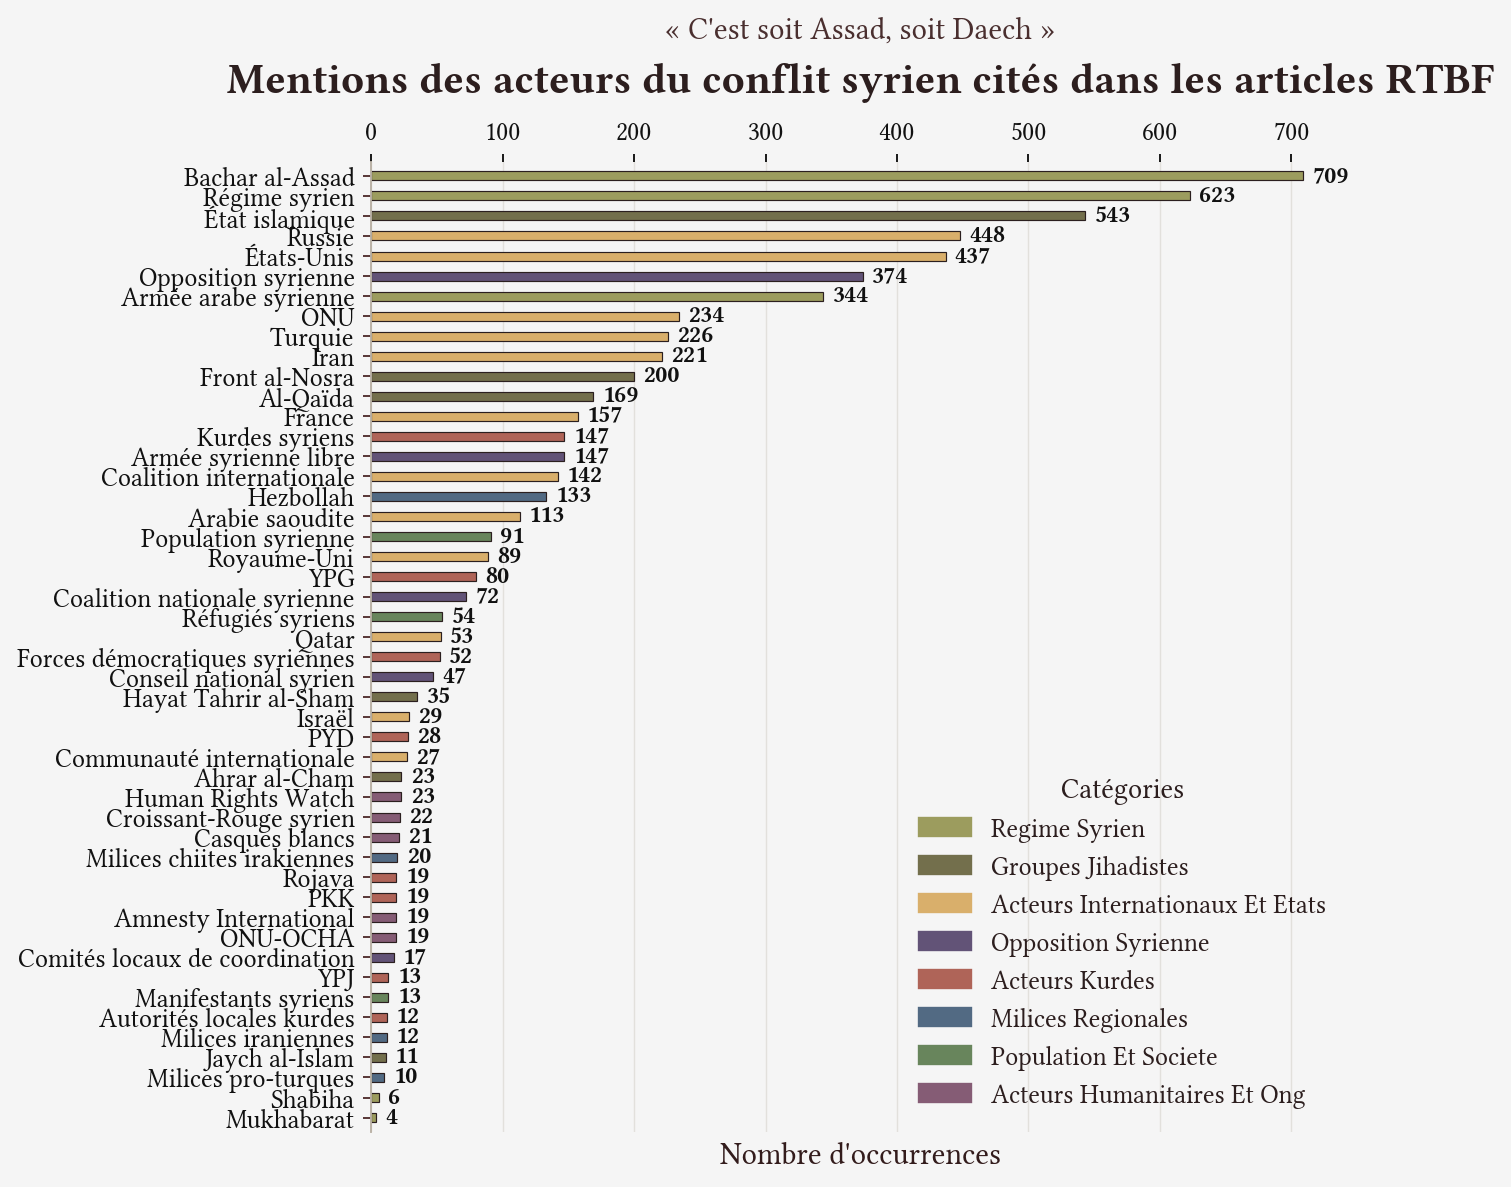

In [9]:
from src.plotting_lib import plot_actor_mentions

acteurs_par_categorie = {
    "regime_syrien": [
        "Bachar al-Assad",
        "Régime syrien",
        "Armée arabe syrienne",
        "Shabiha",
        "Mukhabarat",
    ],
    "groupes_jihadistes": [
        "État islamique",
        "Front al-Nosra",
        "Hayat Tahrir al-Sham",
        "Ahrar al-Cham",
        "Jaych al-Islam",
        "Al-Qaïda",
    ],
    "opposition_syrienne": [
        "Opposition syrienne",
        "Conseil national syrien",
        "Coalition nationale syrienne",
        "Armée syrienne libre",
        "Comités locaux de coordination",
    ],
    "acteurs_kurdes": [
        "Kurdes syriens",
        "PYD",
        "YPG",
        "YPJ",
        "Forces démocratiques syriennes",
        "Rojava",
        "PKK",
        "Autorités locales kurdes",
    ],
    "acteurs_internationaux_et_etats": [
        "États-Unis",
        "Coalition internationale",
        "Russie",
        "Iran",
        "Arabie saoudite",
        "Qatar",
        "Turquie",
        "France",
        "Royaume-Uni",
        "Israël",
        "Communauté internationale",
        "ONU",
    ],
    "milices_regionales": [
        "Hezbollah",
        "Milices chiites irakiennes",
        "Milices iraniennes",
        "Milices pro-turques",
    ],
    "acteurs_humanitaires_et_ong": [
        "Casques blancs",
        "Croissant-Rouge syrien",
        "Human Rights Watch",
        "Amnesty International",
        "ONU-OCHA",
    ],
    "population_et_societe": [
        "Population syrienne",
        "Manifestants syriens",
        "Réfugiés syriens",
    ],
}


plot_actor_mentions(
    rtbf_assad_vs_daech_deepdive,
    acteurs_par_categorie,
    actor_column="st_acteurs",
    stereotype_name="C'est soit Assad, soit Daech",
    title="Mentions des acteurs du conflit syrien cités dans les articles RTBF",
)


<Axes: title={'center': "Mentions des groupes d'acteurs du conflit syrien dans les articles RTBF"}, xlabel="Nombre d'occurrences">

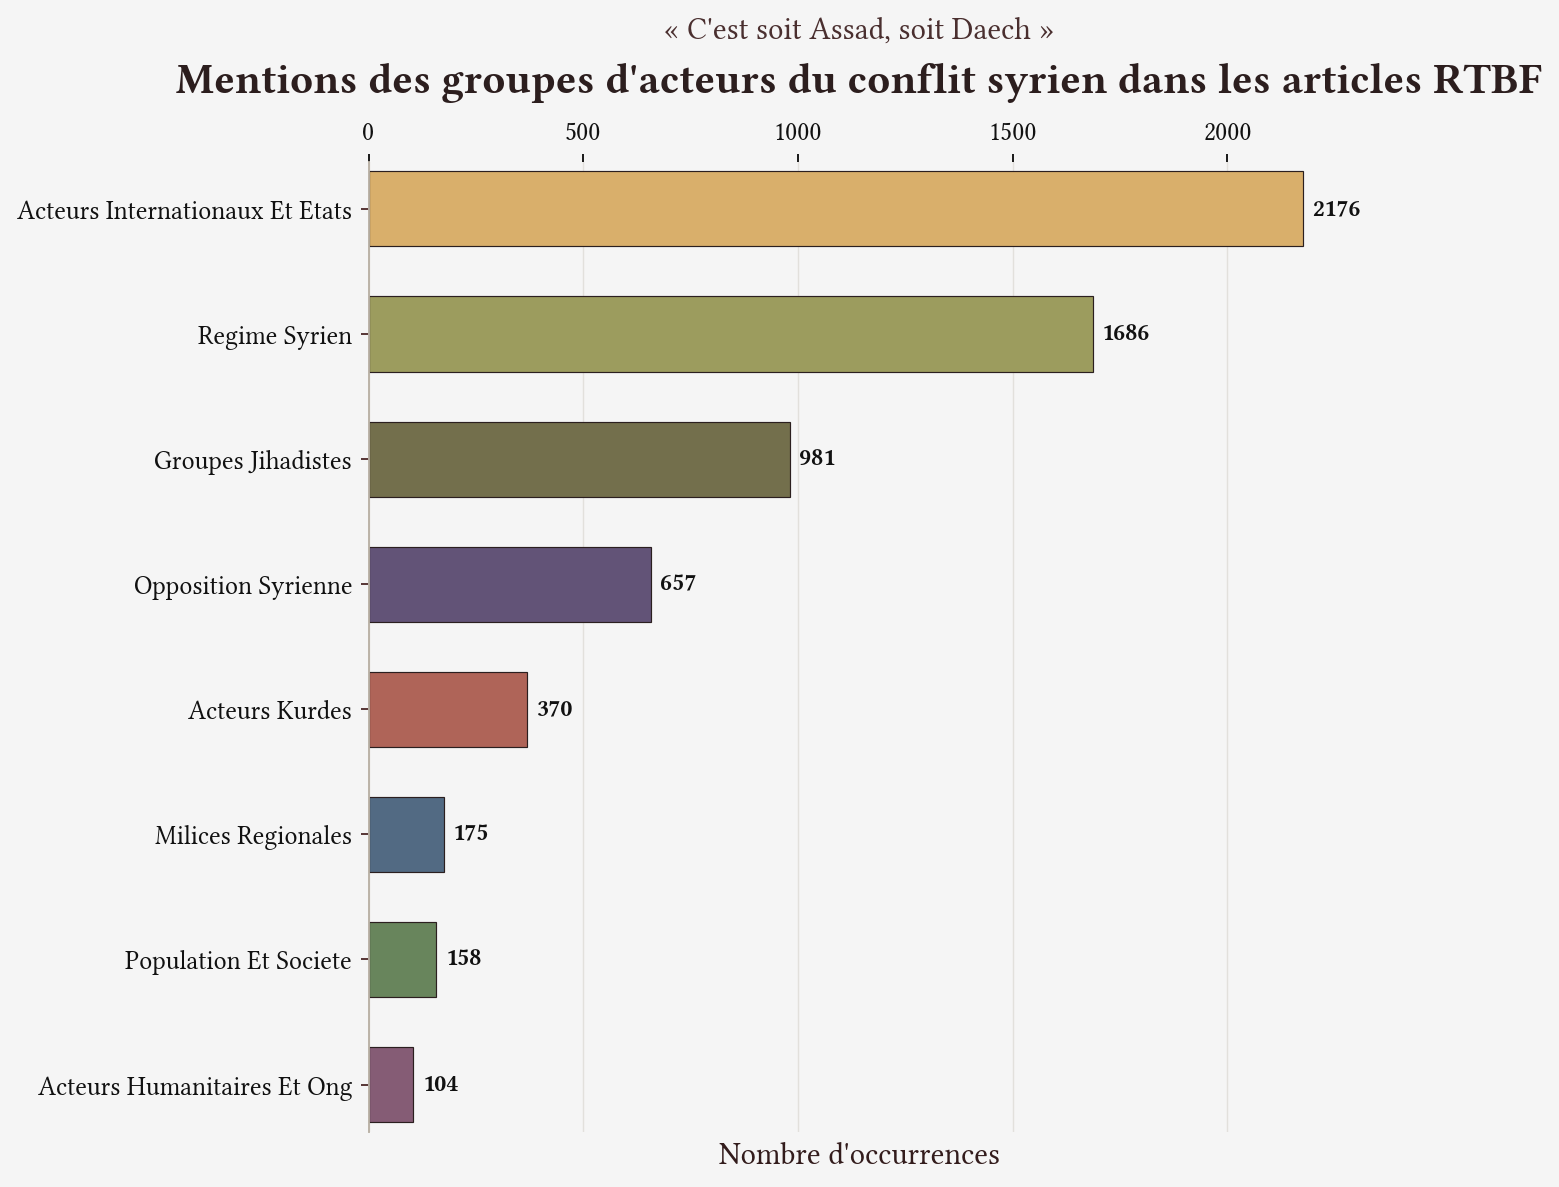

In [10]:
plot_actor_mentions(
    rtbf_assad_vs_daech_deepdive,
    acteurs_par_categorie,
    actor_column="st_acteurs",
    stereotype_name="C'est soit Assad, soit Daech",
    title="Mentions des groupes d'acteurs du conflit syrien dans les articles RTBF",
    group_by_category=True,
)


(<Axes: title={'center': "Évolution du nombre de mentions par catégorie d'acteurs"}, xlabel='Année de publication', ylabel="Nombre de mentions d'acteurs">,
 <Axes: ylabel="Nombre d'articles analysés">)

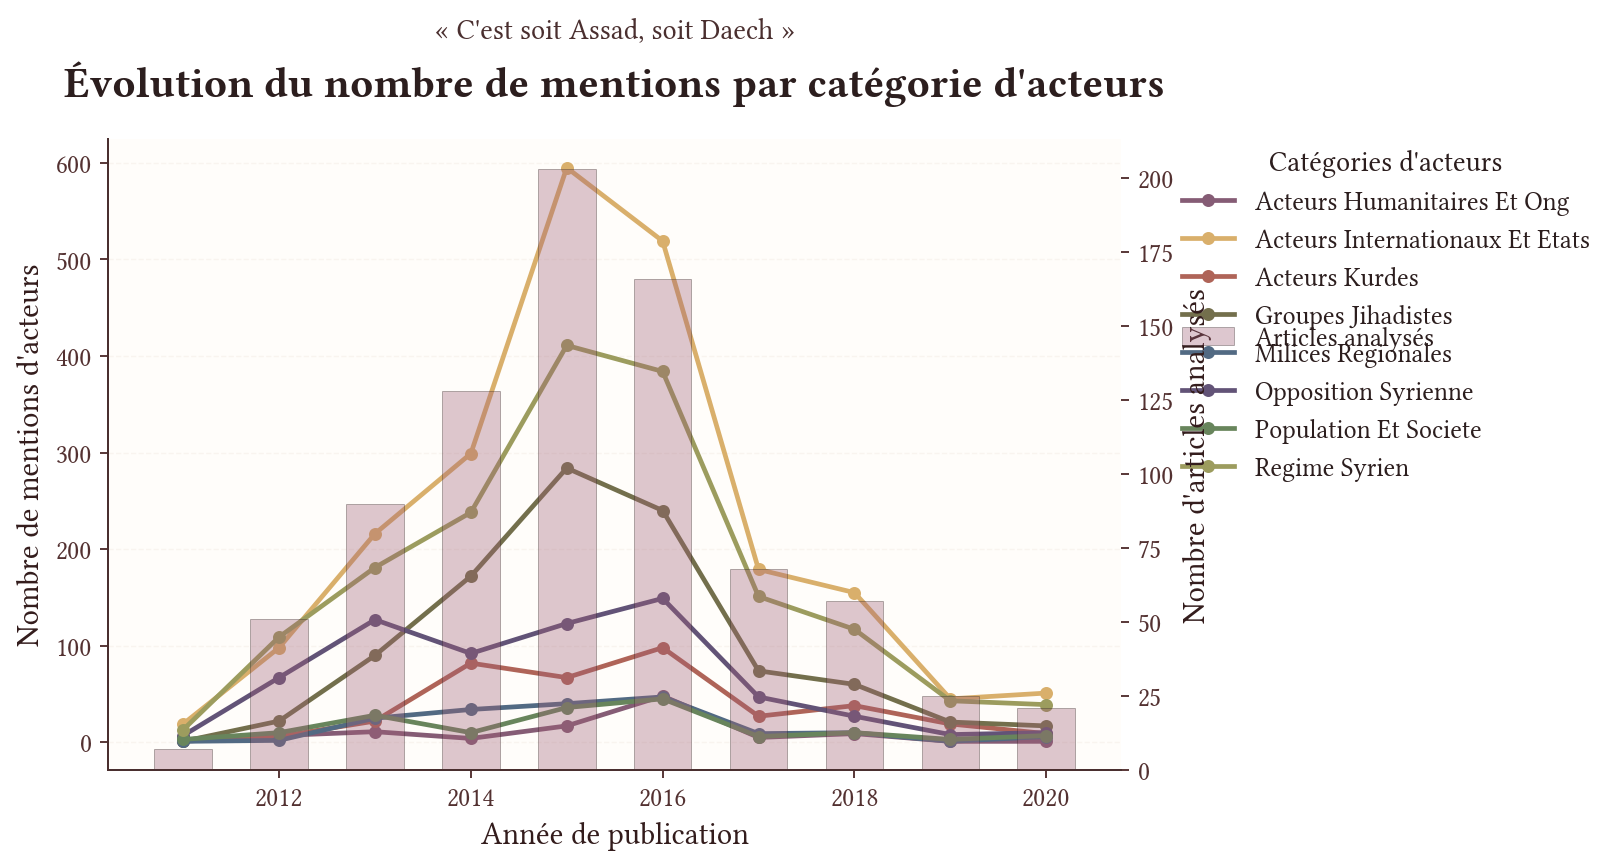

In [ ]:
from src.plotting_lib import plot_actor_category_trends

plot_actor_category_trends(
    rtbf_assad_vs_daech_deepdive,
    acteurs_par_categorie,
    actor_column="st_acteurs",
    pub_date_col="pub_date",
    show_percentages=False,
    # title="Évolution des mentions des groupes d'acteurs du conflit syrien dans les articles RTBF (absolu)",
    stereotype_name="C'est soit Assad, soit Daech",
)


(<Axes: title={'center': "Évolution de la part des mentions par catégorie d'acteurs"}, xlabel='Année de publication', ylabel="Part des mentions d'acteurs">,
 <Axes: ylabel="Nombre d'articles analysés">)

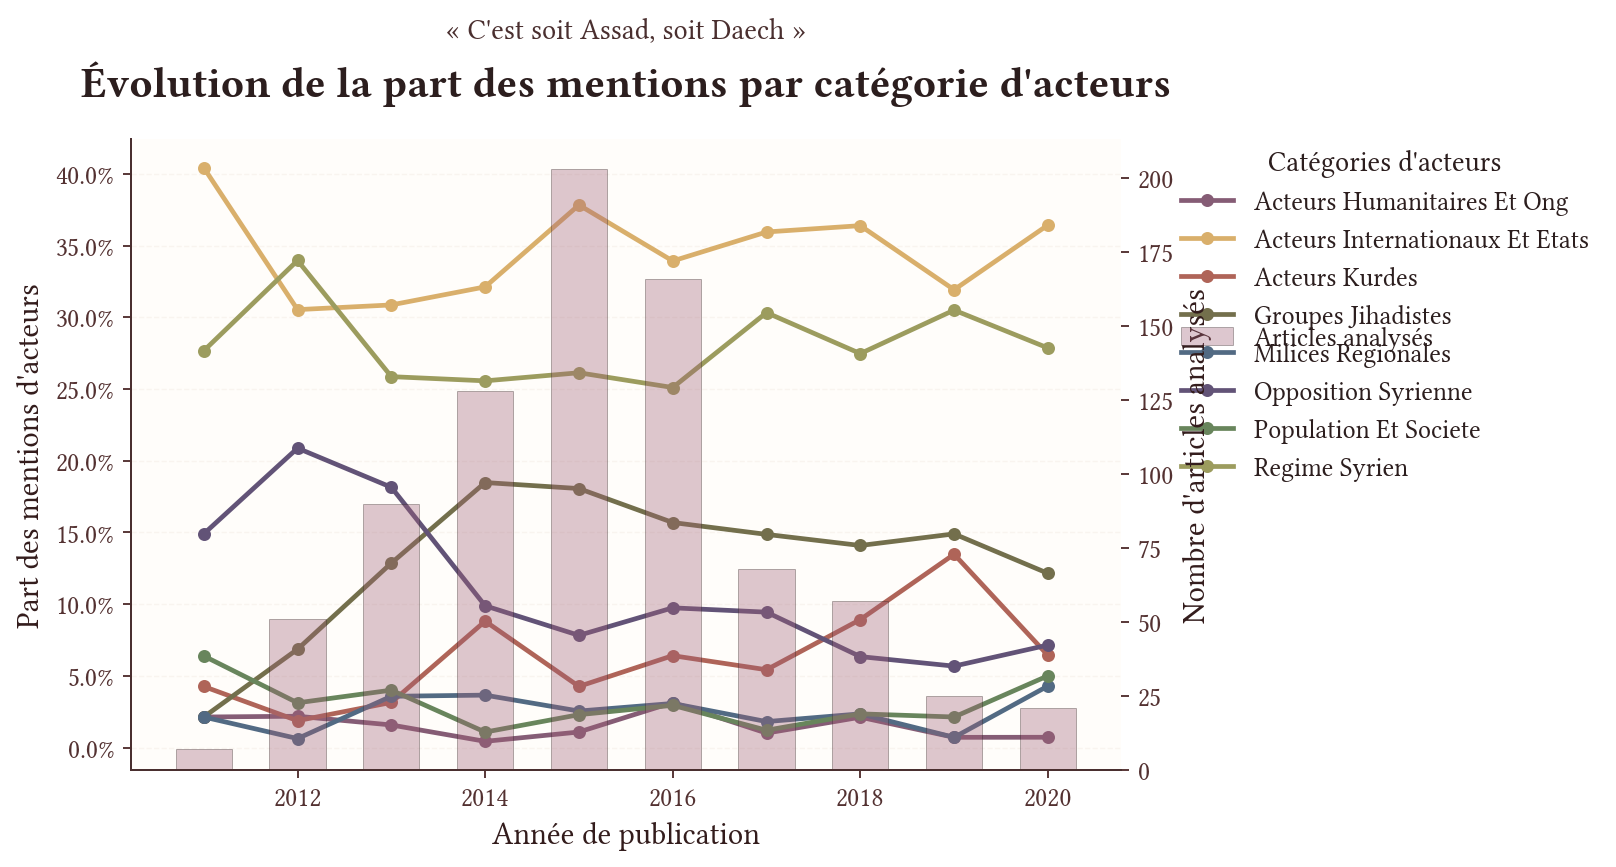

In [12]:
plot_actor_category_trends(
    rtbf_assad_vs_daech_deepdive,
    acteurs_par_categorie,
    actor_column="st_acteurs",
    pub_date_col="pub_date",
    show_percentages=True,
    stereotype_name="C'est soit Assad, soit Daech",
)


(<Axes: title={'center': "Évolution de la part des mentions par catégorie d'acteurs"}, xlabel='Période', ylabel="Part des mentions d'acteurs">,
 <Axes: ylabel="Nombre d'articles analysés">)

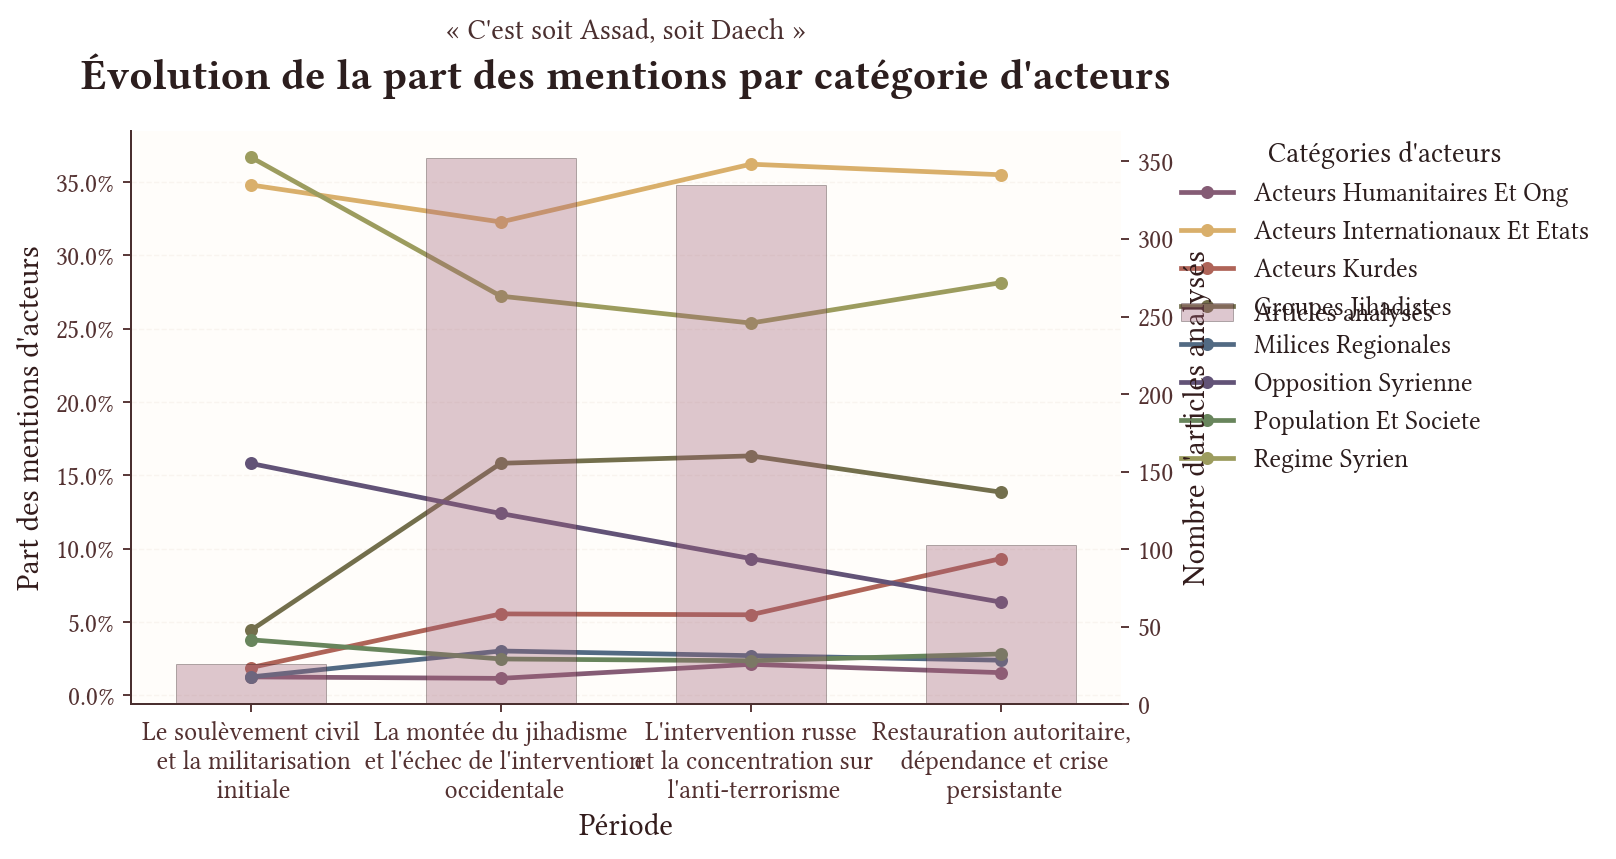

In [13]:
grandes_phases = [
    {
        "title": "Le soulèvement civil\n et la militarisation\n initiale",
        "start_date": "2011-03-01",
        "end_date": "2012-07-01",
    },
    {
        "title": "La montée du jihadisme\n et l'échec de l'intervention\n occidentale",
        "start_date": "2012-07-01",
        "end_date": "2015-10-01",
    },
    {
        "title": "L'intervention russe\n et la concentration sur\n l'anti-terrorisme",
        "start_date": "2015-10-01",
        "end_date": "2017-12-31",
    },
    {
        "title": "Restauration autoritaire,\n dépendance et crise\n persistante",
        "start_date": "2018-01-01",
        "end_date": "2022-12-31",
    },
]

plot_actor_category_trends(
    rtbf_assad_vs_daech_deepdive,
    acteurs_par_categorie,
    periods=grandes_phases,
    show_percentages=True,
    stereotype_name="C'est soit Assad, soit Daech",
)


/home/artamis/Documents/Sciences Po/syria-before-war/src/plotting_lib.py:157: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  else:


(<Axes: title={'center': 'Évolution de la part des prismes mobilisés'}, xlabel='Période', ylabel='Part des prismes mobilisés'>,
 <Axes: ylabel="Nombre d'articles analysés">)

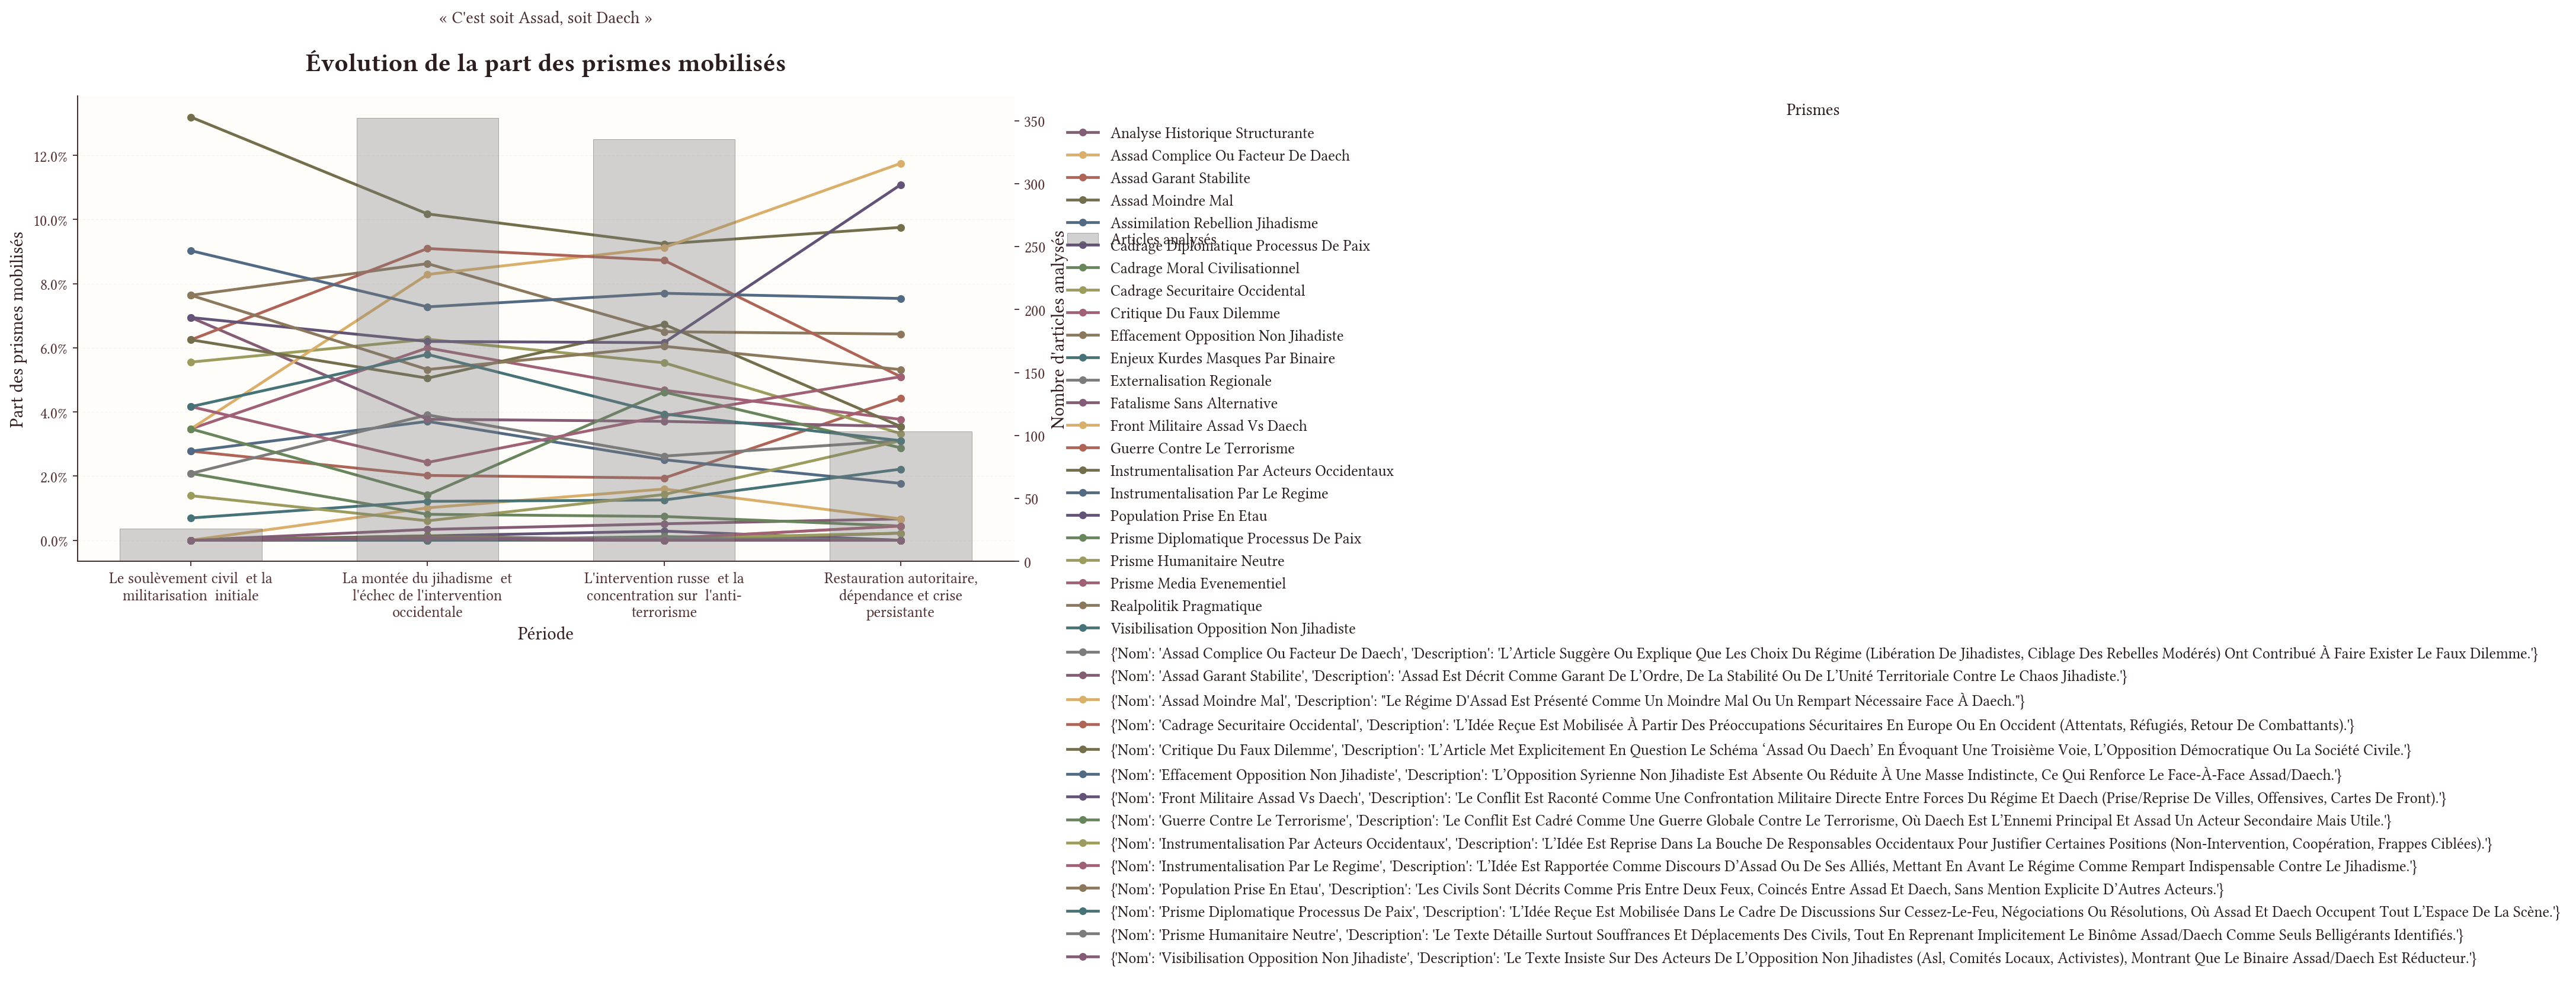

In [ ]:
from src.plotting_lib import plot_prism_trends

PRISMES = {
    "assad_moindre_mal": "Le régime d'Assad est présenté comme un moindre mal ou un rempart nécessaire face à Daech.",
    "assad_garant_stabilite": "Assad est décrit comme garant de l’ordre, de la stabilité ou de l’unité territoriale contre le chaos jihadiste.",
    "guerre_contre_le_terrorisme": "Le conflit est cadré comme une guerre globale contre le terrorisme, où Daech est l’ennemi principal et Assad un acteur secondaire mais utile.",
    "front_militaire_assad_vs_daech": "Le conflit est raconté comme une confrontation militaire directe entre forces du régime et Daech (prise/reprise de villes, offensives, cartes de front).",
    "population_prise_en_etau": "Les civils sont décrits comme pris entre deux feux, coincés entre Assad et Daech, sans mention explicite d’autres acteurs.",
    "fatalisme_sans_alternative": "Le discours suggère qu’il n’existe objectivement aucune alternative politique crédible entre Assad et Daech.",
    "realpolitik_pragmatique": "Justification d’une coopération ou d’un dialogue avec Assad au nom du réalisme politique, pour contenir Daech.",
    "cadrage_securitaire_occidental": "L’idée reçue est mobilisée à partir des préoccupations sécuritaires en Europe ou en Occident (attentats, réfugiés, retour de combattants).",
    "cadrage_moral_civilisationnel": "Opposition moralement chargée entre barbarie jihadiste et régime présenté comme laïc, protecteur des minorités ou de la ‘civilisation’.",
    "effacement_opposition_non_jihadiste": "L’opposition syrienne non jihadiste est absente ou réduite à une masse indistincte, ce qui renforce le face-à-face Assad/Daech.",
    "assimilation_rebellion_jihadisme": "Les groupes rebelles sont présentés de manière vague ou amalgamés à des ‘islamistes’ ou ‘terroristes’, rapprochant la rébellion de Daech.",
    "externalisation_regionale": "Le prisme applique le schéma Assad vs Daech à des contextes voisins (Liban, Irak, Turquie), en parlant de camps pro-régime vs islamistes.",
    "enjeux_kurdes_masques_par_binaire": "Les Kurdes et les FDS apparaissent seulement comme alliés contre Daech, sans être décrits comme une troisième voie politique.",
    "prisme_humanitaire_neutre": "Le texte détaille surtout souffrances et déplacements des civils, tout en reprenant implicitement le binôme Assad/Daech comme seuls belligérants identifiés.",
    "prisme_diplomatique_processus_de_paix": "L’idée reçue est mobilisée dans le cadre de discussions sur cessez-le-feu, négociations ou résolutions, où Assad et Daech occupent tout l’espace de la scène.",
    "prisme_media_evenementiel": "Traitement très factuel et événementiel (attentat, offensive, bombardement) qui reconduit le binôme Assad/Daech par simplification rapide.",
    "instrumentalisation_par_le_regime": "L’idée est rapportée comme discours d’Assad ou de ses alliés, mettant en avant le régime comme rempart indispensable contre le jihadisme.",
    "instrumentalisation_par_acteurs_occidentaux": "L’idée est reprise dans la bouche de responsables occidentaux pour justifier certaines positions (non-intervention, coopération, frappes ciblées).",
    "critique_du_faux_dilemme": "L’article met explicitement en question le schéma ‘Assad ou Daech’ en évoquant une troisième voie, l’opposition démocratique ou la société civile.",
    "visibilisation_opposition_non_jihadiste": "Le texte insiste sur des acteurs de l’opposition non jihadistes (ASL, comités locaux, activistes), montrant que le binaire Assad/Daech est réducteur.",
    "analyse_historique_structurante": "L’idée reçue est replacée dans une histoire plus longue (années 1980, guerre en Irak, montée du jihadisme) pour montrer comment elle s’est construite.",
    "assad_complice_ou_facteur_de_daech": "L’article suggère ou explique que les choix du régime (libération de jihadistes, ciblage des rebelles modérés) ont contribué à faire exister le faux dilemme.",
}


plot_prism_trends(
    rtbf_assad_vs_daech_deepdive,
    prism_column="st_prismes",
    pub_date_col="pub_date",
    show_percentages=True,
    periods=grandes_phases,
    stereotype_name="C'est soit Assad, soit Daech",
    prism_descriptions=PRISMES,  # optional dict of descriptions
)
